In [1]:
from keras.datasets import mnist
data=mnist.load_data()

In [2]:
print(data)
type(data)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

tuple

In [3]:
# Slpit dataset to train and test datasets: X- number images Y- labels
(X_train,Y_train),(X_test,Y_test)=data

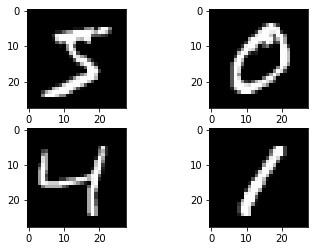

In [4]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
# 28x28 pixels found     28*28=784
print(X_train[0].shape)

# 60000 images in X_train with 28x28
print(X_train.shape)

(28, 28)
(60000, 28, 28)


In [6]:
# Reshape data, into 784x1 (single column) to feed as 1D array to DL algorithm, i.e. convert (60000,28,28) to (60000,784,1)
X_train=X_train.reshape((X_train.shape[0],28*28)).astype('float32')
X_test=X_test.reshape((X_test.shape[0],28*28)).astype('float32')

In [7]:
#Normalize Values 0,255 to 0,1
X_train=X_train/255
X_test=X_test/255

In [8]:
print(X_train[0])
print(X_test[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
from keras.utils import np_utils

print(Y_test.shape)

# Represent labels 1,2...9 as categorical variables eg. 0100000000,0010000000...0000000001 (any categorical variable)
Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

num_classes=Y_test.shape[1]
# 10 bits in categorical variable (10 columns)
print(Y_test.shape)

(10000,)
(10000, 10)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
model= Sequential()

In [11]:
# Add Layer 1 of 32 neurons
model.add(Dense(32,input_dim=28*28,activation='relu'))

# Add Layer 2 of 64 neurons
model.add(Dense(64,activation='relu'))

# Add Output layer of 10 neurons as 10 labels are present
model.add(Dense(10,activation='softmax'))

In [12]:
# Compile Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Train model, read 100 at a time, 10 times of 60000
model.fit(X_train,Y_train,epochs=10,batch_size=100)

Epoch 1/10
600/600 [==============================] - 17s 3ms/step - loss: 0.7935 - accuracy: 0.7713
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2240 - accuracy: 0.9347
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1681 - accuracy: 0.9516
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1343 - accuracy: 0.9603
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1152 - accuracy: 0.9654
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0976 - accuracy: 0.9713
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0897 - accuracy: 0.9729
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0794 - accuracy: 0.9759
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0758 - accuracy: 0.9775
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0663 - accuracy: 0.979

In [14]:
# Check performance: print loss, accuracy
scores=model.evaluate(X_test,Y_test)
print(scores)

313/313 [==============================] - 1s 1ms/step - loss: 0.1065 - accuracy: 0.9671
[0.10647225379943848, 0.9671000242233276]


In [26]:
#Write outputs into file
predicted_test=model.predict(X_test)

fields=["Image","Label"]
rows=[]
image=1

for i in predicted_test:
    rows.append([image,np.argmax(i)])
    image+=1

import csv

with open("./output.csv", 'w') as output_csv:

    # creating a csv writer object 
    csvwriter = csv.writer(output_csv) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)